In [1]:
import torch
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import TUDataset
import os
import matplotlib.pyplot as plt

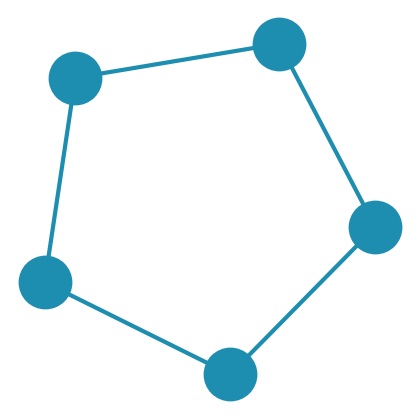

In [57]:
# create random 
import networkx as nx
import matplotlib.pyplot as plt

def generate_connected_graphs(node_counts, k=3, p=0.1):
    """
    Generate and plot connected graphs for a list of node counts.

    Parameters:
        node_counts (list): A list of integers representing the number of nodes in each graph.
        k (int): Each node is joined with k nearest neighbors in a ring topology.
        p (float): The probability of rewiring each edge.
    """
    for n in node_counts:
        # Ensure k is less than n to avoid errors
        k = min(k, n-1)

        # Generate a connected Watts-Strogatz small-world graph
        graph = nx.connected_watts_strogatz_graph(n, k, p, tries=100)

        # Plot the graph
        plt.figure(figsize=(4, 4))
        nx.draw(graph, node_color='#1D8DB0', edge_color='#1D8DB0', font_size=10,node_size=1500,
                with_labels=False, font_color='black', font_weight='bold', linewidths=0, edgecolors='black',width=3)
        plt.show()

# Example usage
node_counts = [5]  # Different sizes of the graph
generate_connected_graphs(node_counts)

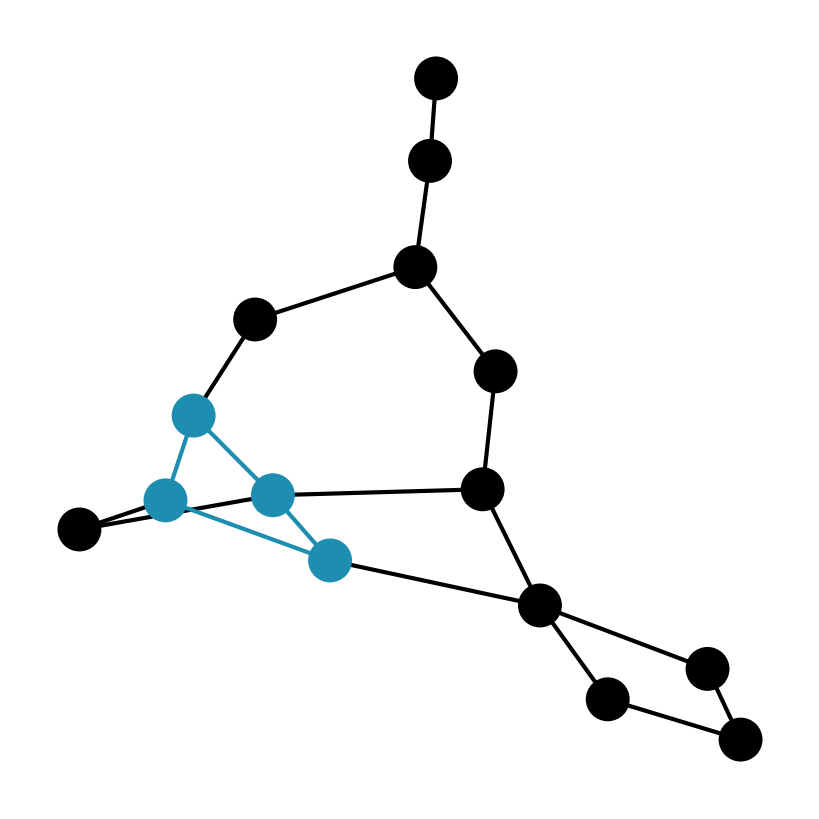

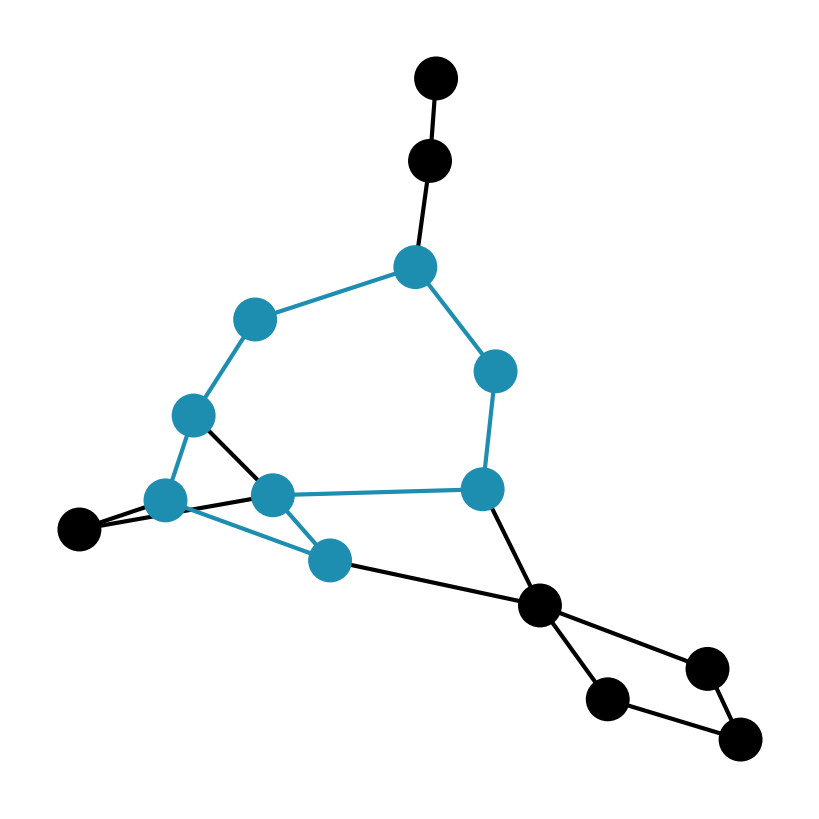

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import numpy
def add_cycle(graph, cycle_nodes):
    """
    Ensure that a specific cycle exists in the graph by adding edges if necessary.
    """
    cycle_pairs = list(zip(cycle_nodes, cycle_nodes[1:] + [cycle_nodes[0]]))
    graph.add_edges_from(cycle_pairs)
    return cycle_pairs  # Return the actual edges added as part of the cycle

def plot_graph_with_highlighted_cycle(graph, cycle_edges, cycle_color, title):
    """
    Plot a graph with specific cycle edges highlighted in a given color.

    Parameters:
        graph (NetworkX graph): The graph to plot.
        cycle_edges (list of tuples): List of edges that form the cycle to highlight.
        cycle_color (str): Color for the highlighted cycle.
        title (str): Title of the plot.
    """
    # Default color for nodes and edges
    default_node_color = 'black'
    default_edge_color = 'black'
    
    # Color map for nodes
    node_colors = [cycle_color if any(node in edge for edge in cycle_edges) else default_node_color for node in graph.nodes()]
    
    # Color map for edges
    edge_colors = [cycle_color if (u, v) in cycle_edges or (v, u) in cycle_edges else default_edge_color for u, v in graph.edges()]
    
    pos = nx.spring_layout(graph, seed=42)  # Use a fixed seed for reproducible layouts

    # Plot the graph
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, node_color=node_colors, edge_color=edge_colors, node_size=1000,
            with_labels=False, linewidths=0, edgecolors='black', width=3)
    #plt.title(title)
    plt.show()

# Create a graph with 15 nodes
n = 15
graph = nx.Graph()
graph.add_nodes_from(range(n))  # Add nodes explicitly

# Manually add edges to form a base connected structure
base_edges = [(i, i + 1) for i in range(n - 1)] + [(n - 1, 0)]
graph.add_edges_from(base_edges)

seed = 54
random.seed(seed)  # Python's built-in random generator
numpy.random.seed(seed) 

graph = nx.connected_watts_strogatz_graph(n, k=3, p=0.3, tries=200,seed=seed)
# Define and add cycles
cycle_4 = [0, 1, 2,3]
cycle_8 = [0, 1, 2, 3, 4, 5, 6, 7]
cycle_4_edges = add_cycle(graph, cycle_4)
cycle_8_edges = add_cycle(graph, cycle_8)

# Plot graph highlighting cycle of length 4
plot_graph_with_highlighted_cycle(graph, cycle_4_edges, '#1D8DB0', 'Graph with Cycle of Length 4 Highlighted')

# Plot graph highlighting cycle of length 8
plot_graph_with_highlighted_cycle(graph, cycle_8_edges, '#1D8DB0', 'Graph with Cycle of Length 8 Highlighted')

The graph has 18 nodes.


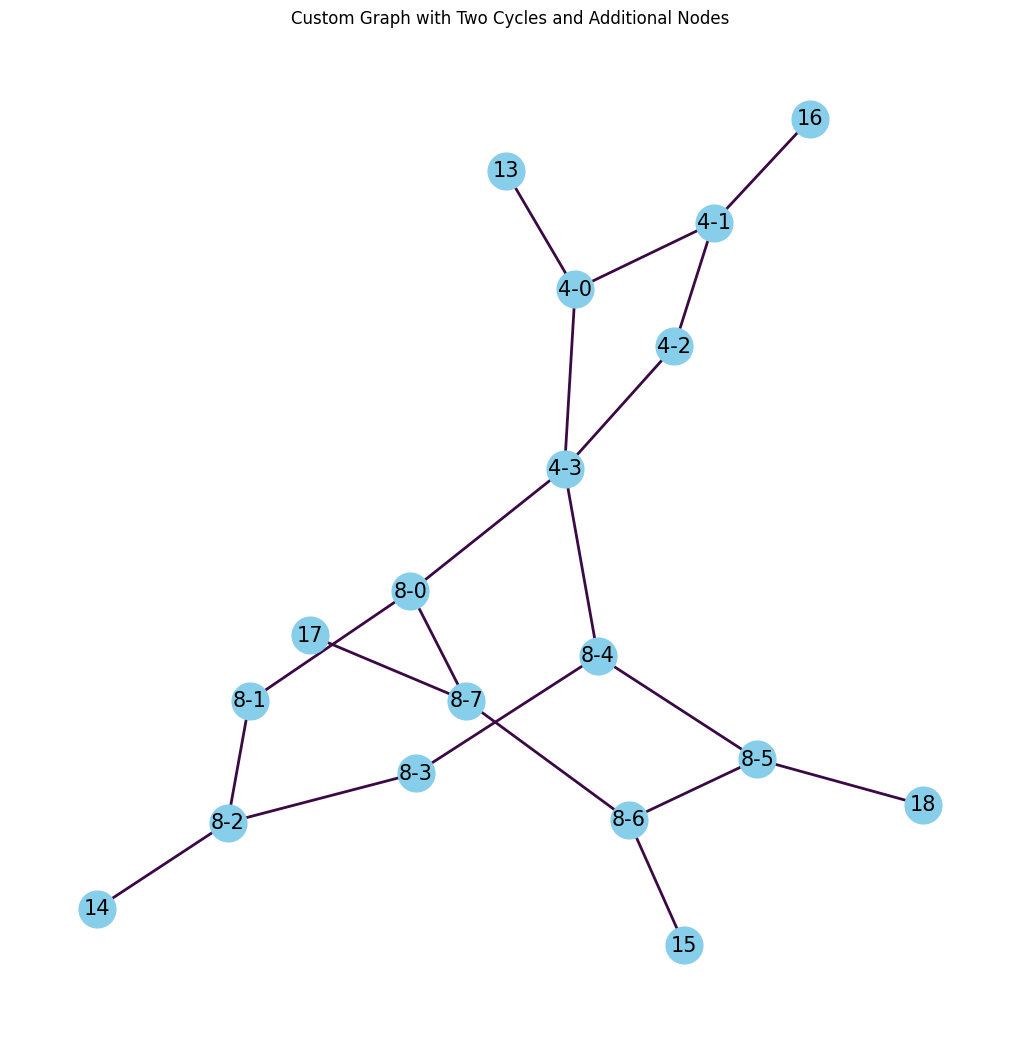

In [125]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Create and add a cycle of 4 nodes
cycle4 = nx.cycle_graph(4)
G = nx.union(G, cycle4, rename=('','4-'))

# Create and add a cycle of 8 nodes
cycle8 = nx.cycle_graph(8)
G = nx.union(G, cycle8, rename=('','8-'))

# Connect some nodes between the two cycles to ensure connectivity
# Node labels are renamed to prevent conflicts
G.add_edge('4-3', '8-0')
G.add_edge('4-3', '8-4')

# Add additional nodes and edges to increase complexity and node count
additional_nodes = [13, 14, 15, 16, 17, 18]
G.add_nodes_from(additional_nodes)
G.add_edges_from([(13, '4-0'), (14, '8-2'), (15, '8-6'), (16, '4-1'), (17, '8-7'), (18, '8-5')])

# Check the node count to make sure it fits the requirement
print(f"The graph has {G.number_of_nodes()} nodes.")

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#3b0a45', width=2, font_size=15)
plt.title('Custom Graph with Two Cycles and Additional Nodes')
plt.show()

In [50]:
def get_graphs(dataset,repr):
    path = os.path.join("docker","Experiment",dataset,repr,"graph","train.pt")
    graphs = torch.load(path)
    return graphs

def plot_graph(graph):
    G = to_networkx(graph)
    nx.draw(G, with_labels=True)
    plt.show()



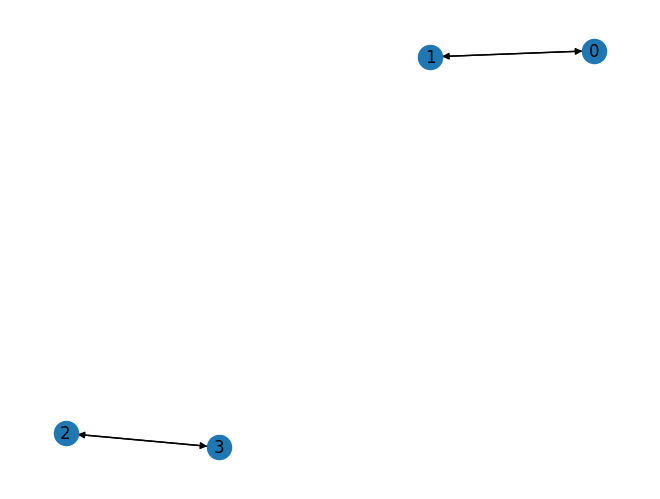

In [51]:
graphs = torch.load("graph_dataset.pt")
dataset = "bongard"
repr = "node_edge"
graphs = torch.load(f"docker/Experiment/{dataset}/{repr}/graph/train.pt")
graph = graphs[0]

plot_graph(graph)
# print(len(graph.x))
# print(graph.y)
# print(graph.x)

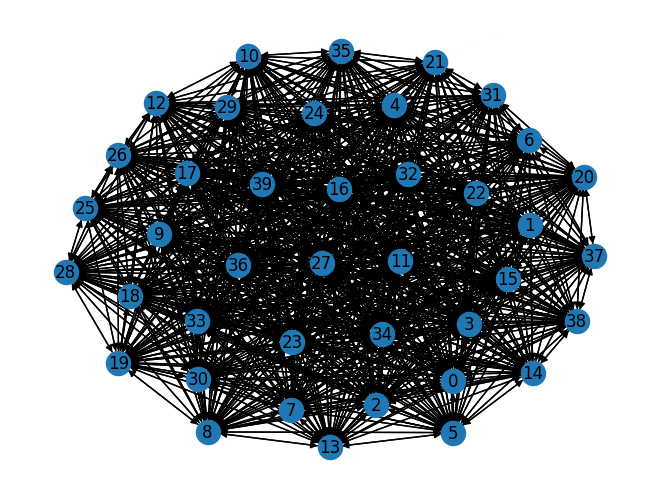

79


In [5]:
graphs = get_graphs("cyclic","node_only")
plot_graph(graphs[1])
print(len(graphs))


In [6]:
graphs = get_graphs("train","Klog")
plot_graph(graphs[0])

FileNotFoundError: [Errno 2] No such file or directory: 'docker/Experiment/train/Klog/graph/train.pt'

In [ ]:
graphs = torch.load("docker/Benchmark/krk/node_edge/graph/train.pt")

: 

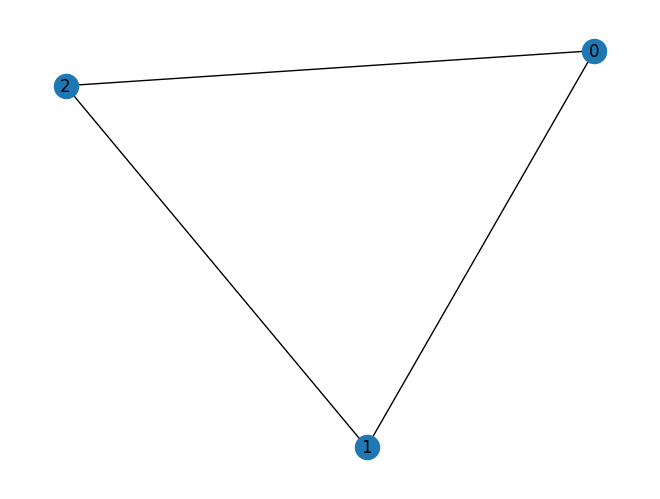

: 

In [ ]:
graph = graphs[0]

G = to_networkx(graph, to_undirected=True)
nx.draw(G, with_labels=True)

In [ ]:
# krk
graphs = torch.load("docker/Benchmark/krk/FullBoard/graph/test.pt")

graphs_y = [graph.y for graph in graphs]
print(graphs_y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


: 